In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from datetime import datetime as dt
from warnings import simplefilter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [150]:
# loading the provided data

train_set = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_set = pd.read_csv('dengue_features_test.csv')


DETERMING THE TRAIN AND TEST SET DETAILS

In [151]:
#Observing the data and information
train_set.info()
train_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [152]:
test_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


AT THIS STAGE BOTH THE TRAIN AND TEST SET ARE COMBINED IN ORDER TO ANALYSE THE DATA FOR THE PREPROCESSING STAGE

In [153]:
#combining the training and testing sets
df = train_set.append(test_set, sort=False)
df["total_cases"] = train_labels.total_cases

# DATA ANALYSIS

In [154]:
#checking for NULL values
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_mi

<AxesSubplot:>

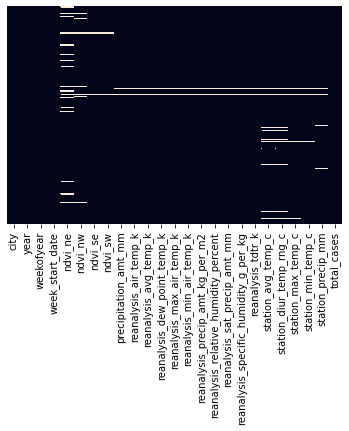

In [155]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) 

From the above Heatmap it can be seen that there are null values. These Null values are replaced with the mean of the corresponding feature distribution. Since the there are only few null values for most of the features in the train set, mean is selected as the parameter to fill the null values.

The two cities are divided in to two different sets with the hypothesis that the spread of dengue may follow different features.

In [156]:
df.fillna(df.mean(), inplace=True)
data_SJ = df[df.city == 'sj']
data_IQ = df[df.city == 'iq']


data_SJ.fillna(data_SJ.mean(), inplace=True)
data_IQ.fillna(data_IQ.mean(), inplace=True)

C:\Users\ASUS\miniconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Following 3 heatmaps shows the combined dataset (df=train_set+test_set), train_set, test_set after replacing the Null values
with the mean values


<AxesSubplot:>

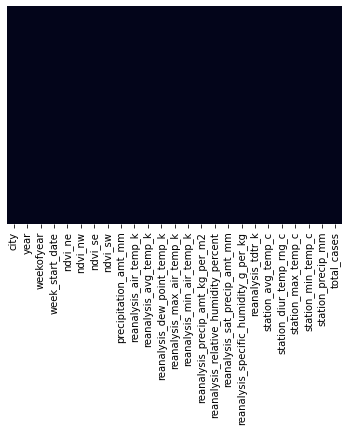

In [157]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) 

<AxesSubplot:>

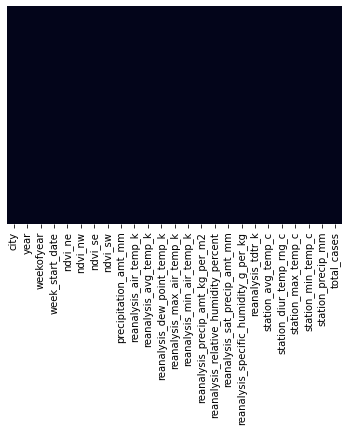

In [158]:
sns.heatmap(data_SJ.isnull(),yticklabels=False,cbar=False) 

<AxesSubplot:>

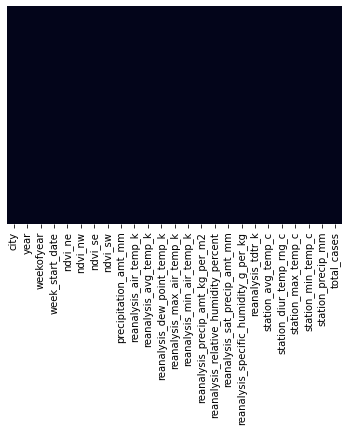

In [159]:
sns.heatmap(data_IQ.isnull(),yticklabels=False,cbar=False) 

Correlatoins between the attributes are considered

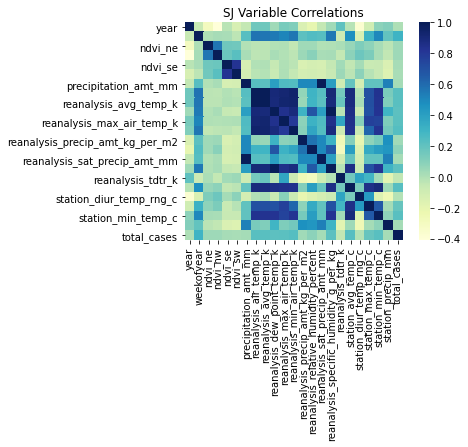

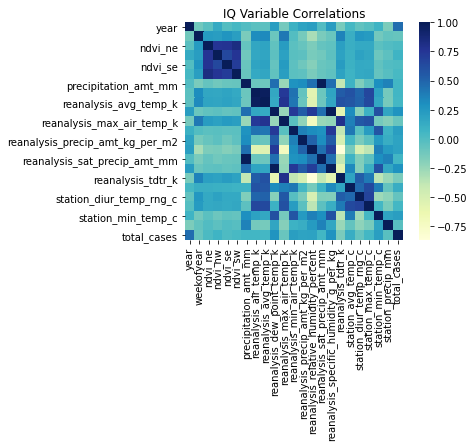

In [160]:
plt.title('SJ Variable Correlations')
sns.heatmap(data_SJ.corr(), square=True, cmap="YlGnBu")
plt.show()

plt.title('IQ Variable Correlations')
sns.heatmap(data_IQ.corr(), square=True, cmap="YlGnBu")
plt.show()



When comparing the above two correlation graphs it can be seen that the Iquitos data are more correlated than that of San Juan's data. 

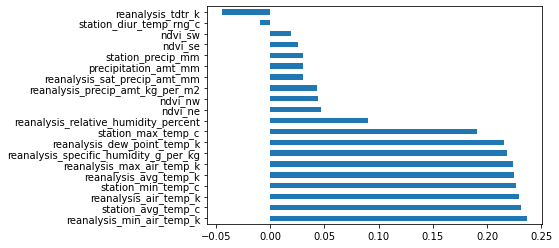

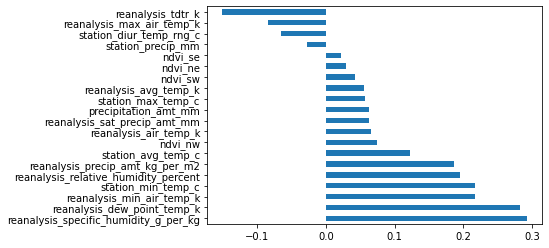

In [161]:
#dropping the total cases , week of the year and year colums
(data_SJ.corr()
     .total_cases
     .drop('total_cases')
     .drop('weekofyear')
     .drop('year')
     .sort_values(ascending=False)
     .plot
     .barh())
plt.show()

(data_IQ.corr()
     .total_cases
     .drop('total_cases')
     .drop('weekofyear')
     .drop('year')
     .sort_values(ascending=False)
     .plot
     .barh())
plt.show()

When considereing the above two correlation graphs, it can be observed that the most correlated elemets for the San Juan city 
are;    
        reanalysis_specific_humidity_g_per_kg

        reanalysis_dew_point_temp_k
        
        reanalysis_min_air_temp_k
        
        station_avg_temp_c  

And for Iquitos are; 
        
        reanalysis_specific_humidity_g_per_kg
        
        reanalysis_dew_point_temp_k
        
        reanalysis_min_air_temp_k
        
        station_min_temp_c. 

Thus other attributes are neglected in the model development

In [162]:
SJ_features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'reanalysis_min_air_temp_k', 
               
                 'station_avg_temp_c']

IQ_features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'reanalysis_min_air_temp_k', 
                 'station_min_temp_c']

# MODEL ANALYSIS


A graph is drawn for each model with PREDICTED and EXPECTED curves for the analysis of the best model

In [163]:
#function to draw the prections and expected curves
def predict(x_train, y_train, x_test, model):
    model = model
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    fig, ax = plt.subplots(figsize=(10,5))
    sns.lineplot(x_train.index, y_train.values, color = 'blue', label='Expected', ax=ax)
    sns.lineplot(x_test.index.values, pred, color = 'red', ax=ax, label = 'Predicted')
    plt.show()

In [164]:
X_train_sj, X_test_sj, Y_train_sj, Y_test_sj = train_test_split(data_SJ[SJ_features],data_SJ["total_cases"],test_size=0.1388, random_state = 30)
X_train_iq, X_test_iq, Y_train_iq, Y_test_iq = train_test_split(data_IQ[IQ_features],data_IQ["total_cases"],test_size=0.1388, random_state = 30)

# San Juan -Logistric Regression

C:\Users\ASUS\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From ve

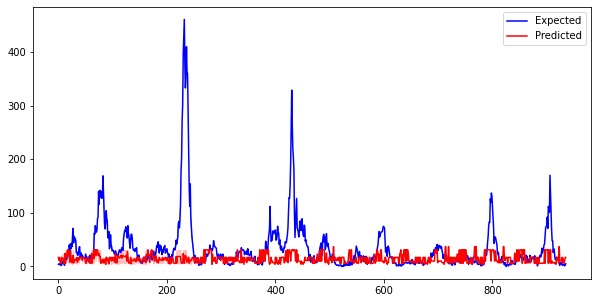

In [165]:
from sklearn.linear_model import LogisticRegression
predict(X_train_sj, Y_train_sj, data_SJ[SJ_features], LogisticRegression())



# Iquitos-Logistric Regression

C:\Users\ASUS\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From ve

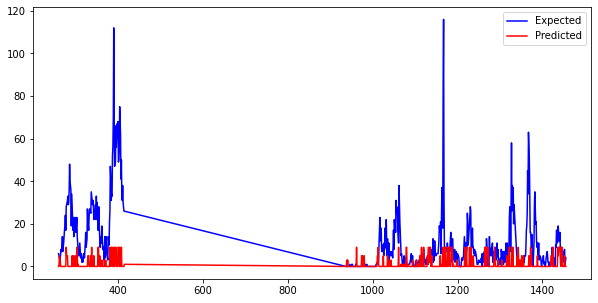

In [166]:
predict(X_train_iq, Y_train_iq, data_IQ[IQ_features], LogisticRegression())

# San Juan - Random Forest Regression


C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


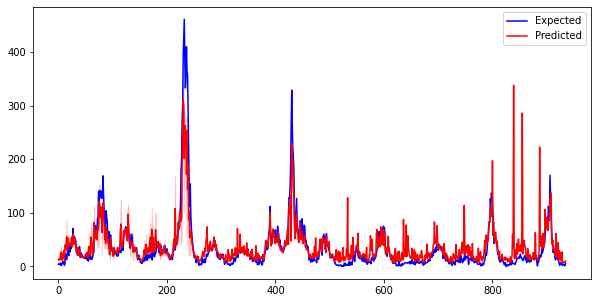

In [167]:
from sklearn.ensemble import RandomForestRegressor
predict(X_train_sj, Y_train_sj, data_SJ[SJ_features], RandomForestRegressor(n_estimators = 1000, random_state = 0))

# Iquitos - Random Forest Regression


C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


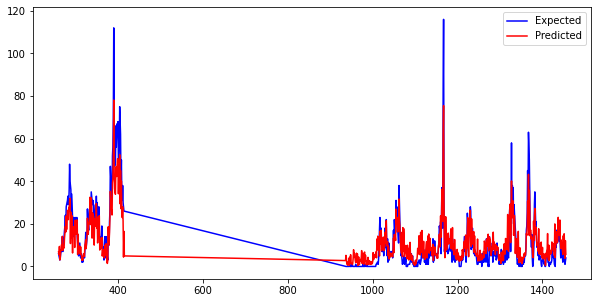

In [168]:
predict(X_train_iq, Y_train_iq, data_IQ[IQ_features], RandomForestRegressor(n_estimators = 1000, random_state = 0))

# Support Vector Machine

It can be seen that the random forest regressor provides similar prections with the exprected, than the logistic regression


# Prediction

C:\Users\ASUS\miniconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ASUS\miniconda3\li

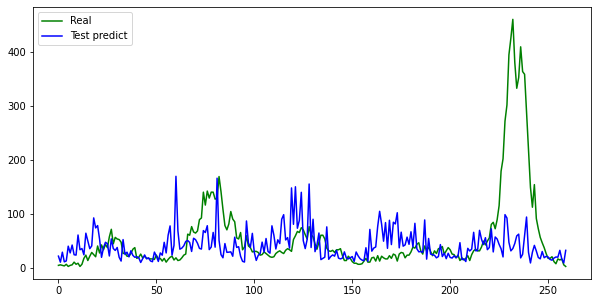

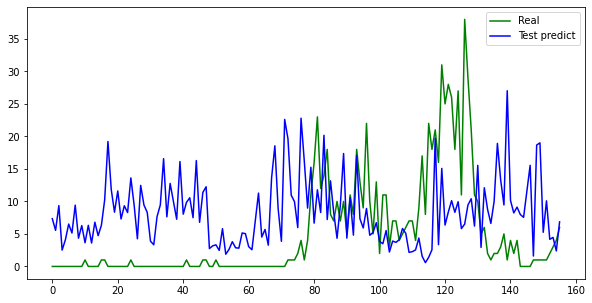

In [169]:
train_set['total_cases'] = train_labels.total_cases 
#loading train and test data of San Juan and Iquitos seperately
SJ_TRAIN = train_set[train_set.city == 'sj']
SJ_TEST = test_set[test_set.city == 'sj']
SJ_LABELS = train_labels[train_labels.city == 'sj']

IQ_TRAIN = train_set[train_set.city == 'iq']
IQ_TEST = test_set[test_set.city == 'iq']
IQ_LABELS = train_labels[train_labels.city == 'iq']

#filling out the missing values using the mean of each column
SJ_TEST.fillna(SJ_TEST.mean(), inplace=True)
IQ_TEST.fillna(IQ_TEST.mean(), inplace=True)

SJ_TRAIN.fillna(SJ_TRAIN.mean(), inplace=True)
IQ_TRAIN.fillna(IQ_TRAIN.mean(), inplace=True)

#prediction using random forrest regression (seperately for San Juans and Iquitos)
SJmodel =  RandomForestRegressor(n_estimators = 1000, random_state = 0)
SJmodel.fit(SJ_TRAIN[SJ_features], SJ_TRAIN['total_cases'])
SJ_predictions = SJmodel.predict(SJ_TEST[SJ_features])

IQmodel =  RandomForestRegressor(n_estimators = 1000, random_state = 0)
IQmodel.fit(IQ_TRAIN[IQ_features], IQ_TRAIN['total_cases'])
IQ_predictions = IQmodel.predict(IQ_TEST[IQ_features])

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(range(0, 260),  SJ_TRAIN['total_cases'][:260].values, color = 'green', label='Real', ax=ax)
sns.lineplot(range(0, 260), SJ_predictions, color = 'blue', ax=ax, label = 'Test predict')

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(range(0, 156),  IQ_TRAIN['total_cases'][:156].values, color = 'green', label='Real', ax=ax)
sns.lineplot(range(0, 156), IQ_predictions, color = 'blue', ax=ax, label = 'Test predict')


#combining the predicted two sets anf parsing it in to the csv file
SJ = [int(x) for x in SJ_predictions]
IQ = [int(x) for x in IQ_predictions]
final = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])
final.total_cases = np.concatenate([SJ, IQ])
final.to_csv('Mayura.csv')